# Bank Note Authentication Web APP using Machine Learning and Streamlit

In [213]:
# Importing libraries and modules
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [214]:
# Checking library versions
print('Python: {}'.format(sys.version))
print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(plt.matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
numpy: 1.26.4
pandas: 2.2.1
matplotlib: 3.8.4
seaborn: 0.12.2
sklearn: 1.4.2


In [215]:
# Suppressing display of warnings
import warnings
warnings.filterwarnings('ignore')

In [216]:
# Loading the dataset
df = pd.read_csv('bank_note_authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [217]:
# Checking the dimensions of dataset
df.shape

(1372, 5)

The dataset has 1372 samples or rows and 5 features or columns

In [218]:
# Checking columns of dataset 
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

5 columns or features of the dataset are variance, skewness, curtosis, entropy, and class.

In [219]:
# Checking for missing or null values
df.isnull().sum() 

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

The dataset is clean and has no null values present, which is good news for building a model.

In [220]:
# Printing summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [221]:
# Generating descriptive statistics
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Conclusion:
1. The variance feature has a mean of 0.433735, a standard deviation of 2.842763, and a range of -7.0421 to 6.8248.
2. The skewness feature has a mean of 1.922353, a standard deviation of 5.869047, and a range of -13.7731 to 12.9516.
3. The curtosis feature has a mean of 1.397627, a standard deviation of 4.310030, and a range of -5.2861 to 17.9274.
4. The entropy feature has a mean of -1.191657, a standard deviation of 2.101013, and a range of -8.5482 to 2.4495.
5. The class feature has a mean of 0.444606, which suggests that the dataset is slightly imbalanced towards the positive class.

In [222]:
# Computing pairwise correlations
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


Conclusion:
1. The variance and entropy features are strongly correlated with the class feature, with correlation coefficients of -0.724843 and 0.205369, respectively. This suggests that these features may be good predictors of the class label and should be included in the model.
2. The skewness and curtosis features have weaker correlations with the class feature, with correlation coefficients of -0.444688 and 0.023424, respectively. This suggests that these features may be less important for predicting the class label and may be excluded from the model.
3. The variance and entropy features are strongly negatively correlated with each other, with a correlation coefficient of -0.227709. This suggests that these features may contain redundant information and may need to be further analyzed or combined before building a model.

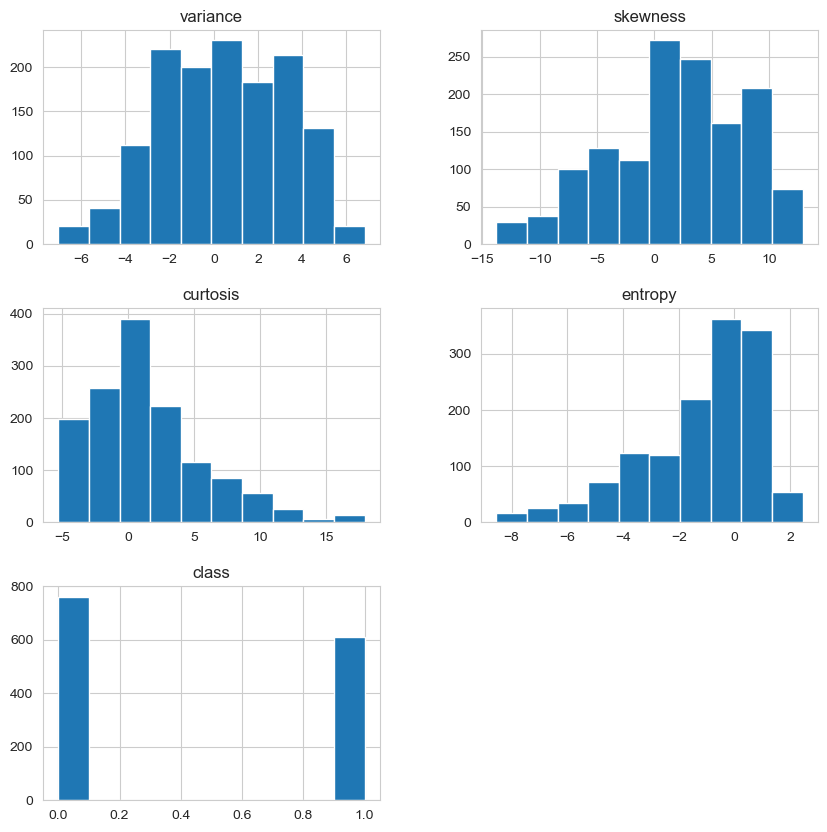

In [223]:
# Checking the distribution of each variable
df.hist(bins=10, figsize=(10,10))
plt.show()

Conclusion:
1. The variance, skewness, and curtosis features are approximately normally distributed, with bell-shaped curves centered around the mean values. This suggests that these features may be suitable for machine learning algorithms that assume a normal distribution, such as linear regression or Gaussian Naive Bayes.
2. The entropy feature is slightly skewed to the right, with a longer tail towards the higher values. This suggests that this feature may not be normally distributed and may need to be transformed or analyzed further before building a model.
3. The histograms do not show any obvious outliers or data quality issues, which is a good sign for building a model.
4. The histograms of the class feature show that the dataset is slightly imbalanced towards the positive class, with more samples in the positive class than in the negative class. This suggests that it may be useful to balance the dataset or use appropriate evaluation metrics that can handle imbalanced data.

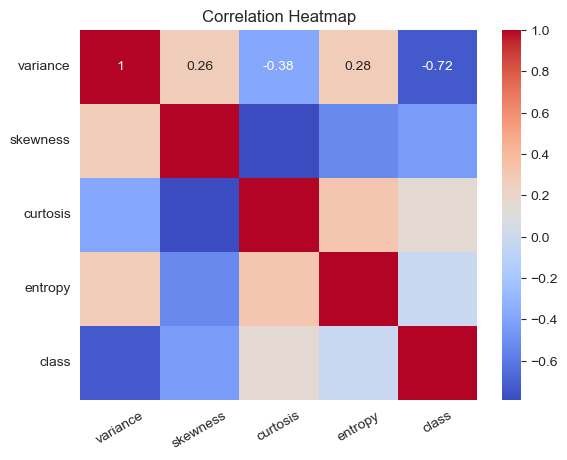

In [224]:
# Checking for correlations between variables:
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=30)
plt.yticks(rotation=0)

# Show the plot
plt.show()

From the above heatmap, we can see their is a multicolliniraty between curtosis and skewness but can be ignored.

# Checking for class imbalance:

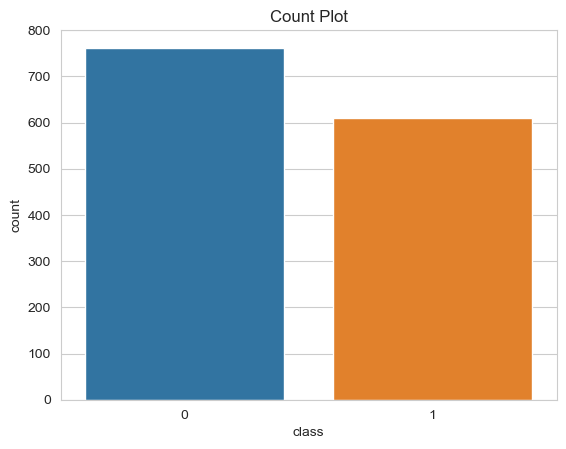

In [225]:
# Visualizing countplot on label data
sns.countplot(data=df, x='class')
plt.title('Count Plot')
plt.show()

The countplot shows that the dataset is slightly imbalanced towards the positive class, which has more samples than the negative class. 
This is consistent with the observation from the histograms of the class feature.

# Visualizing Class Distribution for Each Feature

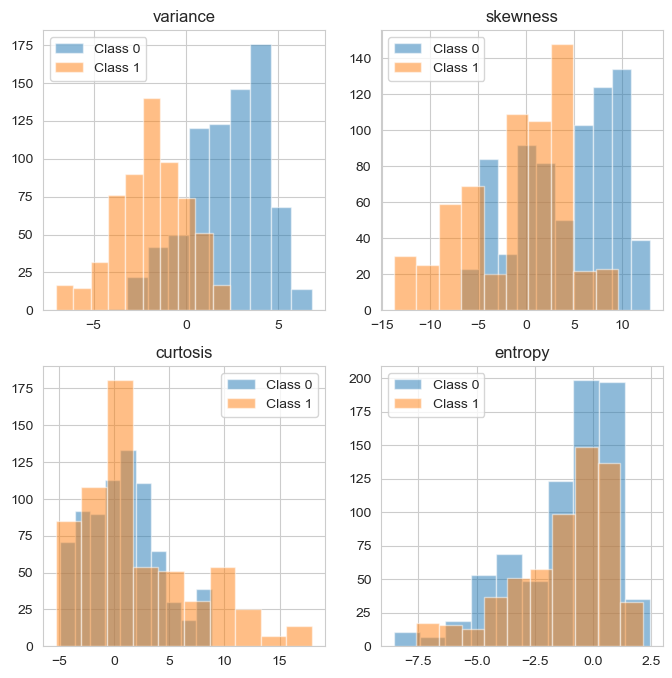

In [226]:
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]

# Creating a 2x2 grid of histograms
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Looping through each feature and plotting a histogram for each class
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    plt.hist(class_0[col], alpha=0.5, label='Class 0')
    plt.hist(class_1[col], alpha=0.5, label='Class 1')
    plt.legend()
    plt.title(col)

# Displaying the plot
plt.show()

Most of the features nearly follow a normal distribution. 
From the plots it is understood that 'variance' is a feature that can help distinguish classes the most. 
'Entropy' on the other hand exhibit the same distribution for both classes.

# Visualizing pairplot for better understanding

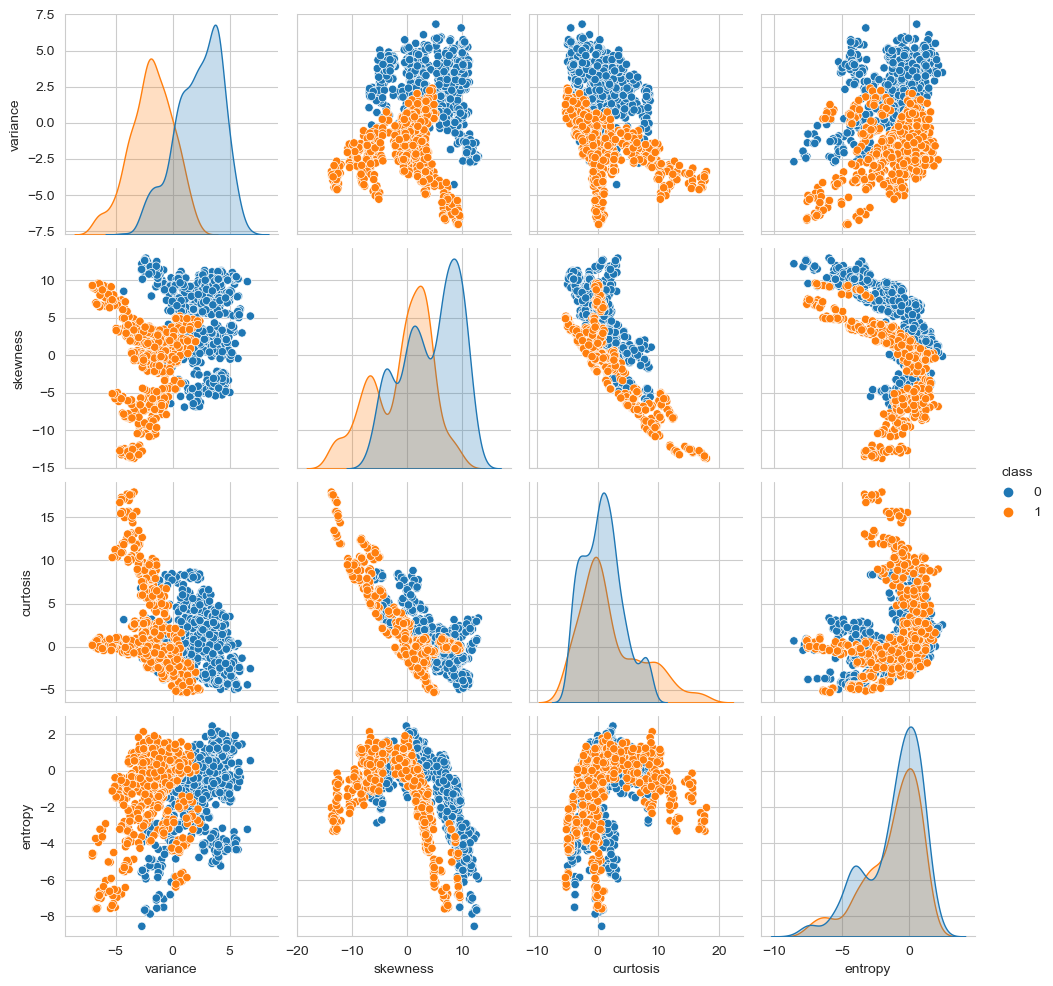

In [227]:
# Visualizing pairplot
sns.pairplot(data = df, hue = 'class')
plt.show()

There are clear separations shown, especially for pairs of features having 'variance'. 
The curtosis-entropy scatterplot exhibits the lowest separation

# Data PreProcessing

corr_matrix = df.corr()
corr_matrix

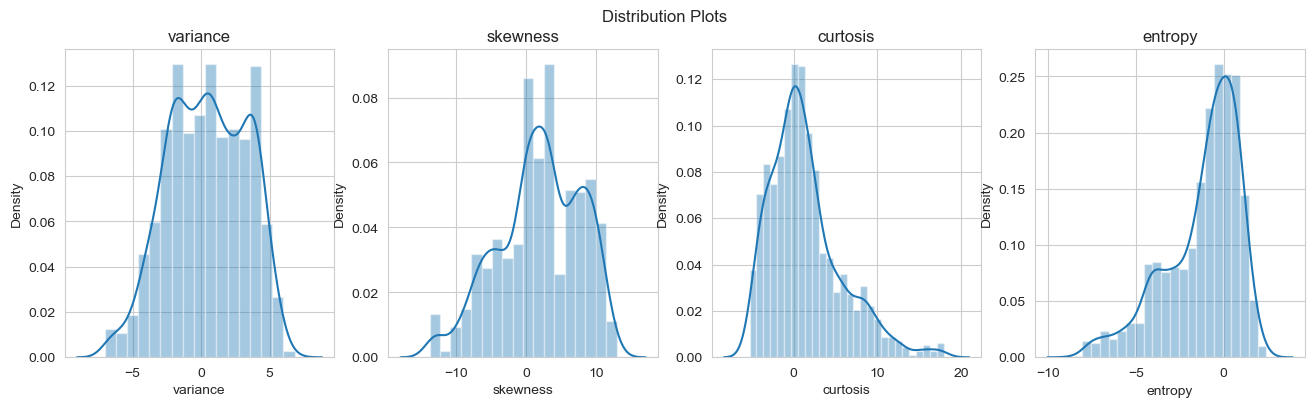

In [228]:
# Define the columns to plot
columns = ['variance', 'skewness', 'curtosis', 'entropy']

# Create the subplots
fig, ax = plt.subplots(ncols=4, figsize=(16, 4))
fig.suptitle('Distribution Plots')

# Create the distribution plots
for index, column in enumerate(columns):
    sns.distplot(df[column], ax=ax[index])
    ax[index].set_title(column)

# Show the plot
plt.show()

Conclusion:
1. Their may be outliers in entropy and curtosis column.
2. Data is not normalized.
3. Since we gonna use trees in our model above things dont effect model much.

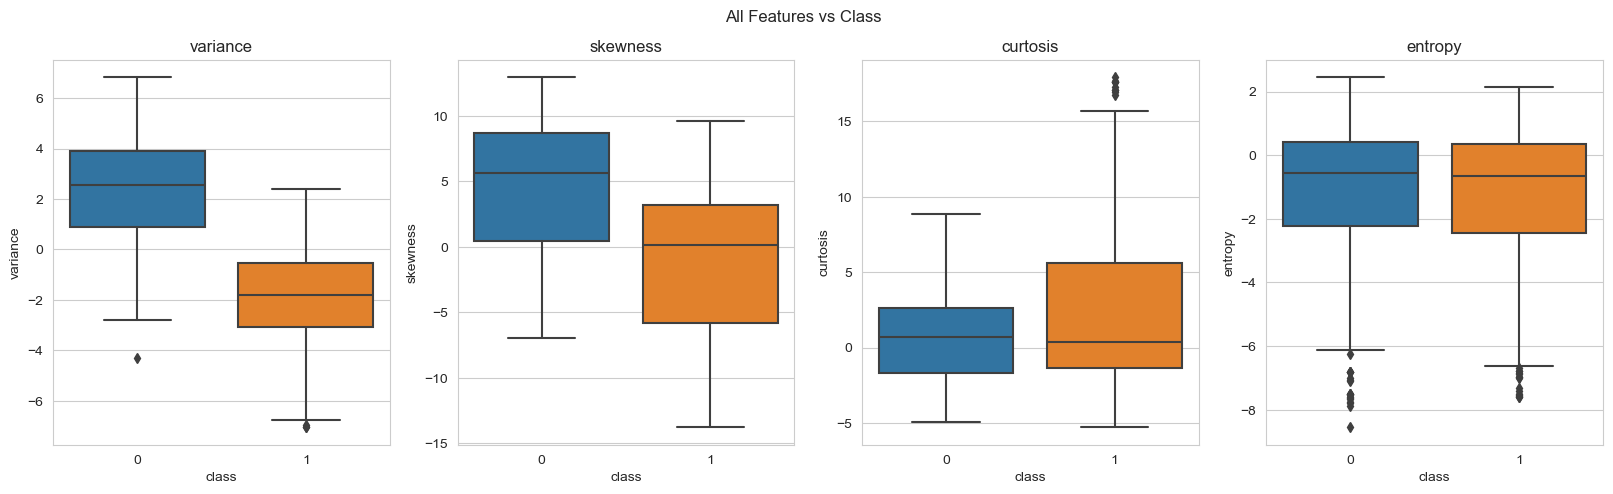

In [229]:
# Define the columns to plot
columns = ['variance', 'skewness', 'curtosis', 'entropy']

# Create the subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle('All Features vs Class')

# Create the box plots
for index, column in enumerate(columns):
    sns.boxplot(x='class', y=column, data=df, ax=ax[index])
    ax[index].set_title(column)

# Show the plot
plt.show()

# Define the columns to remove outliers from
columns = ['variance', 'skewness', 'curtosis', 'entropy']

# Calculate the IQR for each column
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df2 = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show the updated DataFrame
print(df2)

In [230]:
# Split the dataset into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head(), y.head()

(   variance  skewness  curtosis  entropy
 0   3.62160    8.6661   -2.8073 -0.44699
 1   4.54590    8.1674   -2.4586 -1.46210
 2   3.86600   -2.6383    1.9242  0.10645
 3   3.45660    9.5228   -4.0112 -3.59440
 4   0.32924   -4.4552    4.5718 -0.98880,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: class, dtype: int64)

In [231]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(2), X_test.head(2), y_train.head(2), y_test.head(2)

(     variance  skewness  curtosis   entropy
 529   -1.3885   12.5026   0.69118 -7.548700
 243    2.7744    6.8576  -1.06710  0.075416,
      variance  skewness  curtosis  entropy
 430   1.56910    6.3465   -0.1828  -2.4099
 588  -0.27802    8.1881   -3.1338  -2.5276,
 529    0
 243    0
 Name: class, dtype: int64,
 430    0
 588    0
 Name: class, dtype: int64)

In [232]:
# Check the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of y_train: (1097,)
Shape of X_test: (275, 4)
Shape of y_test: (275,)


In [233]:
# Apply StandardScaler to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.6391558 ,  1.80557961, -0.18836535, -3.05096841],
       [ 0.82188925,  0.85239902, -0.59407847,  0.60345479],
       [-1.65703344, -1.63328321,  2.38386151, -0.34235536],
       ...,
       [-2.62138845,  1.26364283, -0.3095615 , -1.608634  ],
       [-1.36636167,  0.14870015, -0.31055139,  0.07724503],
       [-1.33045764, -1.52810408,  2.29230217,  0.29354966]])

In [234]:
# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.39886742,  0.76609776, -0.39003127, -0.58781728],
       [-0.24941276,  1.07705921, -1.07095774, -0.64423373],
       [-0.13359364,  0.88524111, -0.82182311, -0.94294857],
       ...,
       [ 1.06342549, -1.05676514,  0.46960667,  0.64126101],
       [-0.24940574,  1.07705921, -1.07095774, -0.64423373],
       [ 0.82494267,  1.54841503, -1.16860874, -1.5435897 ]])

In [235]:
# Create a Logistic Regression classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
lr_y_pred = lr_clf.predict(X_test_scaled)

In [236]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)*100
print("Logistic Regression Accuracy Score:", lr_accuracy)

Logistic Regression Accuracy Score: 97.81818181818181


In [237]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
print("Logistic Regression Confusion Matrix:\n\n", lr_cm)

Logistic Regression Confusion Matrix:

 [[144   4]
 [  2 125]]


In [238]:
lr_cr = classification_report(y_test, lr_y_pred)
print("Logistic Regression Classification Report:\n\n", lr_cr)

Logistic Regression Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [239]:
# Create a Decision Tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled, y_train)
dt_y_pred = dt_clf.predict(X_test_scaled)

In [240]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)*100
print("Decision Tree Classifier Accuracy Score:", dt_accuracy)

Decision Tree Classifier Accuracy Score: 97.0909090909091


In [241]:
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Decision Tree Classifier Confusion Matrix:\n\n", dt_cm)

Decision Tree Classifier Confusion Matrix:

 [[147   1]
 [  7 120]]


In [242]:
dt_cr = classification_report(y_test, dt_y_pred)
print("Decision Tree Classifier Classification Report:\n\n", dt_cr)

Decision Tree Classifier Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       148
           1       0.99      0.94      0.97       127

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [243]:
# Create a Random Forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
rf_y_pred = rf_clf.predict(X_test_scaled)

In [244]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100
print("Random Forest Classifier Accuracy Score:", rf_accuracy)

Random Forest Classifier Accuracy Score: 99.27272727272727


In [245]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Classifier Confusion Matrix:\n\n", rf_cm)

Random Forest Classifier Confusion Matrix:

 [[148   0]
 [  2 125]]


In [246]:
rf_cr = classification_report(y_test, rf_y_pred)
print("Random Forest Classifier Classification Report:\n\n", rf_cr)

Random Forest Classifier Classification Report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [247]:
# Create a Support Vector Machine classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)
svm_y_pred = svm_clf.predict(X_test_scaled)

In [248]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)*100
print("Support Vector Classifier Accuracy Score:", svm_accuracy)

Support Vector Classifier Accuracy Score: 98.54545454545455


In [249]:
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("Support Vector Classifier Confusion Matrix:\n\n", svm_cm)

Support Vector Classifier Confusion Matrix:

 [[146   2]
 [  2 125]]


In [250]:
svm_cr = classification_report(y_test, svm_y_pred)
print("Support Vector Classifier Classification Report:\n\n", svm_cr)

Support Vector Classifier Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [251]:
# Create a Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)
nb_y_pred = nb_clf.predict(X_test_scaled)

In [252]:
nb_accuracy = accuracy_score(y_test, nb_y_pred)*100
print("Naive Bayes Classifier Accuracy Score:", nb_accuracy)

Naive Bayes Classifier Accuracy Score: 80.72727272727272


In [253]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
print("Naive Bayes Classifier Confusion Matrix:\n\n", nb_cm)

Naive Bayes Classifier Confusion Matrix:

 [[133  15]
 [ 38  89]]


In [254]:
nb_cr = classification_report(y_test, nb_y_pred)
print("Naive Bayes Classifier Classification Report:\n", nb_cr)

Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       148
           1       0.86      0.70      0.77       127

    accuracy                           0.81       275
   macro avg       0.82      0.80      0.80       275
weighted avg       0.81      0.81      0.80       275



In [255]:
# Summarizing Accuracy Scores of Classifiers
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Support Vector Classifier Accuracy:", svm_accuracy)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Logistic Regression Accuracy: 97.81818181818181
Decision Tree Classifier Accuracy: 97.0909090909091
Random Forest Classifier Accuracy: 99.27272727272727
Support Vector Classifier Accuracy: 98.54545454545455
Naive Bayes Classifier Accuracy: 80.72727272727272


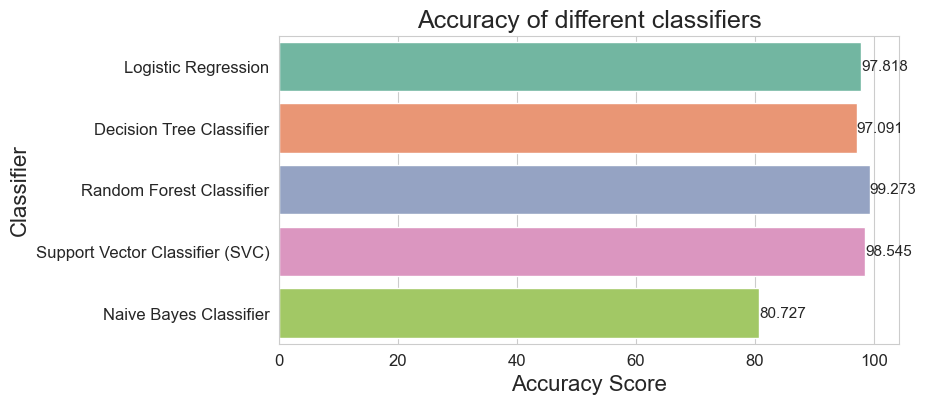

In [256]:
accuracy_scores = [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, nb_accuracy]
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Classifier (SVC)',
          'Naive Bayes Classifier']

sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Accuracy Score', fontsize=16)
plt.ylabel("Classifier", fontsize=16)
plt.title("Accuracy of different classifiers", fontsize=18)
ax = sns.barplot(x=accuracy_scores, y=models, palette="Set2")
for i, acc in enumerate(accuracy_scores):
    ax.text(acc+0.01, i, str(round(acc, 3)), va='center', fontsize=11)
plt.show()

As Random Forest Classifier has highest accuracy, it will be used to build the model  
Based on our analysis of the banknote authentication dataset, we found that the Random Forest Classifier had the highest accuracy compared to other models. Therefore, we have decided to use this model to build our final machine learning model for the banknote authentication project. 

# Testing

In [257]:
## Testing the model using sample data
sample_data_1 = [[3.45, 9.52, -4.01, -3.59]]
sample_data_2 = [[-3.56, -8.38, 12.39, -1.28]]
sample_data_3 = [[4.54, 8.16, -2.45, -1.46]]
sample_data_4 = [[-1.38, -4.87, 6.47, 0.34]]

prediction_1 = rf_clf.predict(sample_data_1) 
prediction_2 = rf_clf.predict(sample_data_2) 
prediction_3 = rf_clf.predict(sample_data_3) 
prediction_4 = rf_clf.predict(sample_data_4) 

print(prediction_1)  # expected output 0
print(prediction_2)  # expected output 1
print(prediction_3)  # expected output 0
print(prediction_4)  # expected output 1

[0]
[1]
[0]
[1]


# Ready for Deployment

In [258]:
# Create a joblib file using serialization 
import joblib
joblib.dump(rf_clf, 'classifier.joblib')

['classifier.joblib']